In [1]:
import numpy as np
import ROOT
from scipy.stats import norm
from array import array

Welcome to JupyROOT 6.28/06


In [2]:
s = 10
tau = 1

In [3]:
mu = 0

In [4]:
samplePoints = 1000000

In [5]:
def likelihood_fn(n, m, tau, mu, s, b):
    mu_cap = (n - m/tau)/s
    b_cap = m/tau
    b_cap2 = (((n + m - (1 + tau)*mu*s)**2 + 4*(1 + tau)*m*mu*s)/(4*(1 + tau)**2))**0.5 + (n + m - (1 + tau)*mu*s)/(2*(1+tau)) 
    ln =  ((mu*s + b_cap2)**n)*((tau*b_cap2)**m)*np.exp(-(mu*s + b_cap2))*np.exp(-tau*b_cap2)
    ld =  ((mu_cap*s + b_cap)**n)*((tau*b_cap)**m)*np.exp(-(mu_cap*s + b_cap))*np.exp(-tau*b_cap)
    ratio = ln/ld
    ratio = -2 * np.log(ratio)
    ratio[mu_cap < 0] = 0
    q0 = ratio
    return q0

In [6]:
b_ = np.linspace(1, 100, 99)
b_ = b_.astype(int)

In [7]:
Z_val = []

In [8]:
for b in b_:
    En =  b
    Em = tau* b
    n = np.random.poisson(En, samplePoints)
    m = np.random.poisson(Em, samplePoints)
    q0_0 = likelihood_fn(n, m, tau, mu, s, b)
    q = 9
    p_val = np.size(q0_0[q0_0 >= q])/np.size(q0_0)
    Z_val.append(norm.ppf(1-p_val))
    print(norm.ppf(1-p_val))

3.956675683651406
3.211160665269332
2.9343937048638695
2.840945490239163
2.835597857130166
2.8630381790452692
2.894965670986481
2.9203842851527497
2.947649387778494
2.9628551143920125
2.97456948335946
2.9792021994909206
2.9995260500211924
2.9988507775701008
2.9959402924065808
3.0031507943459586
3.0049780683360408
2.984545456825957
2.9817563408422227
2.980689751296126
2.9959402924065808
3.002013819615216
2.989537662761519
2.9785666900432695
2.9875753151787263
2.9981768698106848
3.003834847228122
2.996833125165796
2.9959402924065808
2.9999769927034015
2.9984013544574606
2.9979525361504673
3.0013334929744957
2.9921721647458743
2.991291688809235
2.9995260500211924
2.984760968680633
2.9899753075388333
2.990852318970307
2.9823979264997504
2.9948275993578
2.992392646625888
2.984545456825957
2.991951828226196
2.989756413570584
2.9966096929421258
2.9877927863968443
2.985840612497471
3.0070458167639784
2.991291688809235
3.001107025793357


/tmp/ipykernel_1866/1335144531.py:5: RuntimeWarning: overflow encountered in multiply
  ln =  ((mu*s + b_cap2)**n)*((tau*b_cap2)**m)*np.exp(-(mu*s + b_cap2))*np.exp(-tau*b_cap2)
/tmp/ipykernel_1866/1335144531.py:6: RuntimeWarning: overflow encountered in multiply
  ld =  ((mu_cap*s + b_cap)**n)*((tau*b_cap)**m)*np.exp(-(mu_cap*s + b_cap))*np.exp(-tau*b_cap)
/tmp/ipykernel_1866/1335144531.py:7: RuntimeWarning: invalid value encountered in divide
  ratio = ln/ld


3.004291664590704
2.9977283532625902
3.0061252303571866
2.9966096929421258
3.0008807124266403
2.99705670709752
2.9981768698106848


/tmp/ipykernel_1866/1335144531.py:8: RuntimeWarning: divide by zero encountered in log
  ratio = -2 * np.log(ratio)


2.9975043209332974
2.992392646625888
3.0033786558532864
2.992834047278085
2.9990757164667476
3.002468143842906
2.993718601852383
2.9875753151787263
2.9932760318091294
3.0070458167639784
3.0022409042673086
2.9899753075388333
3.0192515939919637
3.021651260590743
3.021410509649941
3.00843149259758
3.029449326846692
3.055347356640063
3.049267657443553
3.063177660190059
3.1060572559770963
3.1098221866419493
3.14834104243722
3.1801477085928296
3.2384051057063377
3.2500123421881915
3.28772624127333
3.3849161526615212
3.4192240241628773
3.476502232079636


/tmp/ipykernel_1866/1335144531.py:6: RuntimeWarning: overflow encountered in power
  ld =  ((mu_cap*s + b_cap)**n)*((tau*b_cap)**m)*np.exp(-(mu_cap*s + b_cap))*np.exp(-tau*b_cap)


3.5160612054258857
3.6153000069246914
3.6813524899158914
3.7400276682884126
3.7540501895515996
3.9326915370962303


/tmp/ipykernel_1866/1335144531.py:5: RuntimeWarning: overflow encountered in power
  ln =  ((mu*s + b_cap2)**n)*((tau*b_cap2)**m)*np.exp(-(mu*s + b_cap2))*np.exp(-tau*b_cap2)


4.06515767544233
3.9695781159105588
4.144874411979401
4.205939313612622
4.314451021808444


In [9]:
type(Z_val)

list

In [10]:
b_ = array('d', b_)
Z_val = array('d', Z_val)

In [11]:
type(b_)
type(Z_val)

array.array

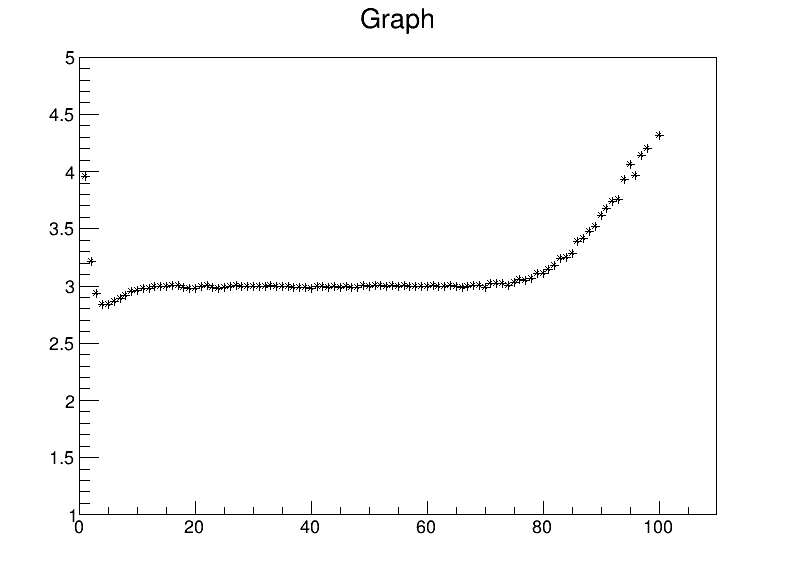

In [12]:
gZ = ROOT.TGraph(len(b_), b_, Z_val)
canvas = ROOT.TCanvas("canvas", "1D Histogram", 800, 600)
#axis = ROOT.TAxis(gZ.GetXaxis())
#axis.SetLimits(0.,5.)
gZ.GetHistogram().SetMaximum(5)   
gZ.GetHistogram().SetMinimum(1)    

gZ.Draw('A*')
canvas.Draw()

In [76]:
len(b_)

75